In [2]:
!pip3.11 install pandas matplotlib seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [4]:
# Load saved ESG data
import pandas as pd

df = pd.read_csv("../data/real_time_esg_data.csv")

# Display first few rows
df.head()

,Symbol,AssetType,Name,Description,CIK,Exchange,Currency,Country,Sector,Industry,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
0,TSLA,Common Stock,Tesla Inc,"Tesla, Inc. is an American electric vehicle an...",1318605,NASDAQ,USD,USA,MANUFACTURING,MOTOR VEHICLES & PASSENGER CAR BODIES,...,10.890,72.31,2.336,488.54,138.80,400.70,275.66,3216520000,NaN,NaN
1,AAPL,Common Stock,Apple Inc,Apple Inc. is an American multinational techno...,320193,NASDAQ,USD,USA,TECHNOLOGY,ELECTRONIC COMPUTERS,...,9.430,27.17,1.200,259.81,163.31,240.69,224.39,15022100000,2025-02-13,2025-02-10
2,GOOGL,Common Stock,Alphabet Inc Class A,Alphabet Inc. is an American multinational con...,1652044,NASDAQ,USD,USA,TECHNOLOGY,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING...",...,6.090,15.73,0.991,207.05,130.19,192.01,175.70,5833000000,2025-03-17,2025-03-10
3,MSFT,Common Stock,Microsoft Corporation,Microsoft Corporation is an American multinati...,789019,NASDAQ,USD,USA,TECHNOLOGY,SERVICES-PREPACKAGED SOFTWARE,...,11.560,21.17,0.895,465.64,383.35,427.45,426.32,7433980000,2025-03-13,2025-02-20
4,AMZN,Common Stock,Amazon.com Inc,"Amazon.com, Inc. is an American multinational ...",1018724,NASDAQ,USD,USA,TRADE & SERVICES,RETAIL-CATALOG & MAIL-ORDER HOUSES,...,3.644,18.78,1.156,242.52,151.61,228.14,197.99,10597700000,NaN,NaN


Columns in the DataFrame: Index(['Symbol', 'AssetType', 'Name', 'Description', 'CIK', 'Exchange',
       'Currency', 'Country', 'Sector', 'Industry', 'Address', 'OfficialSite',
       'FiscalYearEnd', 'LatestQuarter', 'MarketCapitalization', 'EBITDA',
       'PERatio', 'PEGRatio', 'BookValue', 'DividendPerShare', 'DividendYield',
       'EPS', 'RevenuePerShareTTM', 'ProfitMargin', 'OperatingMarginTTM',
       'ReturnOnAssetsTTM', 'ReturnOnEquityTTM', 'RevenueTTM',
       'GrossProfitTTM', 'DilutedEPSTTM', 'QuarterlyEarningsGrowthYOY',
       'QuarterlyRevenueGrowthYOY', 'AnalystTargetPrice',
       'AnalystRatingStrongBuy', 'AnalystRatingBuy', 'AnalystRatingHold',
       'AnalystRatingSell', 'AnalystRatingStrongSell', 'TrailingPE',
       'ForwardPE', 'PriceToSalesRatioTTM', 'PriceToBookRatio', 'EVToRevenue',
       'EVToEBITDA', 'Beta', '52WeekHigh', '52WeekLow', '50DayMovingAverage',
       '200DayMovingAverage', 'SharesOutstanding', 'DividendDate',
       'ExDividendDate'],
      dt

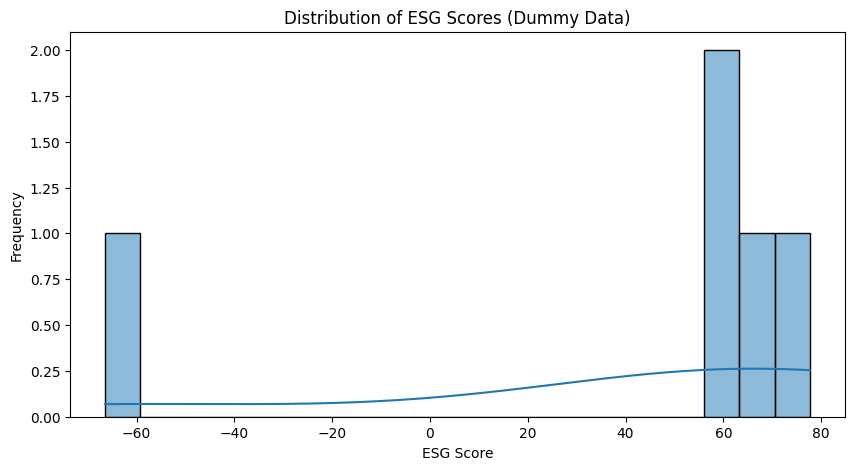

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file (ensure the file path is correct)
df = pd.read_csv("../data/real_time_esg_data.csv")

# Check available columns
print("Columns in the DataFrame:", df.columns)

# Step 2: Create a Dummy ESG_Score Column if It Doesn't Exist
if 'ESG_Score' not in df.columns:
    print("No 'ESG_Score' column found. Creating a dummy ESG_Score column.")
    if 'PERatio' in df.columns:
        # Use PERatio to create a dummy ESG_Score (example logic)
        df['ESG_Score'] = 100 - pd.to_numeric(df['PERatio'], errors='coerce')
    else:
        # Use a default constant value if PERatio is not available
        df['ESG_Score'] = 50

# Ensure ESG_Score is numeric
df['ESG_Score'] = pd.to_numeric(df['ESG_Score'], errors='coerce')

# Step 3: Visualize ESG Score Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['ESG_Score'], bins=20, kde=True)
plt.title("Distribution of ESG Scores (Dummy Data)")
plt.xlabel("ESG Score")
plt.ylabel("Frequency")
plt.show()
